In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Model

In [2]:
# Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# Data is only 2D, so reshape
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

X_train.shape

(60000, 28, 28, 1)

In [5]:
k = len(set(Y_train))
k

10

In [7]:
# Build the model using functional API

i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

In [8]:
model = Model(i, x)

In [9]:
# Compile
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# Fit
r = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5204 - accuracy: 0.8054 - val_loss: 0.4066 - val_accuracy: 0.8488
Epoch 2/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3616 - accuracy: 0.8659 - val_loss: 0.3437 - val_accuracy: 0.8757
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3105 - accuracy: 0.8816 - val_loss: 0.3212 - val_accuracy: 0.8775
Epoch 4/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2787 - accuracy: 0.8952 - val_loss: 0.3057 - val_accuracy: 0.8870
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2507 - accuracy: 0.9054 - val_loss: 0.3020 - val_accuracy: 0.8918
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2329 - accuracy: 0.9111 - val_loss: 0.3017 - val_accuracy: 0.8925
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2132 - accuracy: 0.9183 - val_loss: 0.3021 -

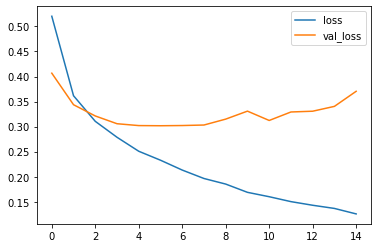

In [13]:
# Plot loss per iteration

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend();

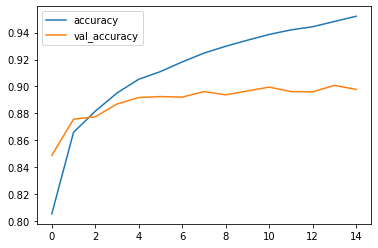

In [14]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend();